<a href="https://colab.research.google.com/github/AlexTostes/hello-world/blob/master/ident_MKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-9ad739900507>:8: RuntimeWarning: invalid value encountered in sqrt
  omega_n = np.sqrt(k / m)  # Frequência natural
<ipython-input-1-9ad739900507>:9: RuntimeWarning: invalid value encountered in sqrt
  zeta = c / (2 * np.sqrt(m * k))  # Razão de amortecimento


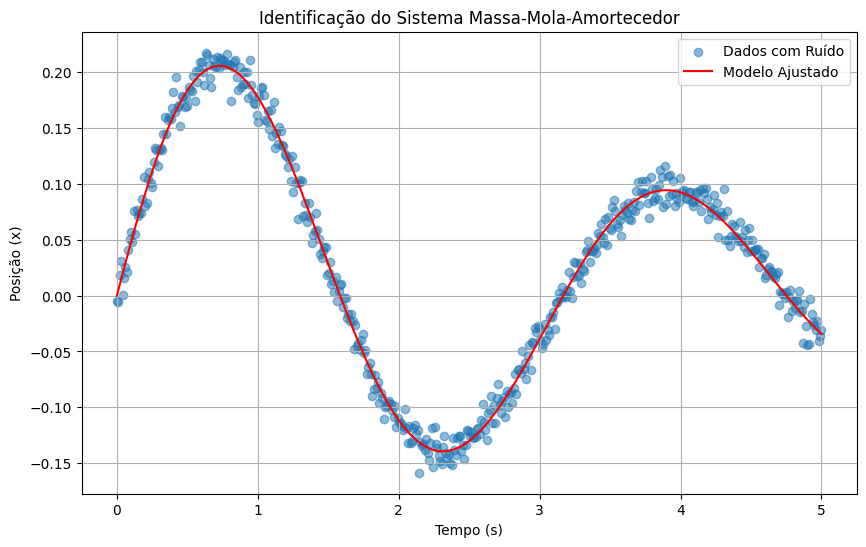

Massa Estimada: 1.0086380909365096 kg
Constante da Mola Estimada: 4.029060097000173 N/m
Constante do Amortecedor Estimada: 0.49621785639109706 Ns/m


In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Defina a função que representa o modelo do sistema massa-mola-amortecedor
def modelo_massa_mola_amortecedor(t, m, k, c):
    # t é o tempo, m é a massa, k é a constante da mola, c é a constante do amortecedor
    omega_n = np.sqrt(k / m)  # Frequência natural
    zeta = c / (2 * np.sqrt(m * k))  # Razão de amortecimento
    omega_d = omega_n * np.sqrt(1 - zeta**2)  # Frequência amortecida
    A = 1.0  # Amplitude da entrada (por exemplo, uma força aplicada)

    # Solução da equação diferencial para o sistema massa-mola-amortecedor
    x = A / (m * omega_n**2) * np.sin(omega_d * t) * np.exp(-zeta * omega_n * t)
    return x

# Crie dados de exemplo com ruído
tempo = np.linspace(0, 5, 500)  # Tempo de 0 a 5 segundos
m_real = 1.0  # Massa real
k_real = 4.0  # Constante da mola real
c_real = 0.5  # Constante do amortecedor real

# Gere dados de saída com base no modelo e adicione algum ruído
saida_real = modelo_massa_mola_amortecedor(tempo, m_real, k_real, c_real)
ruido = np.random.normal(0, 0.01, tempo.shape)
saida_com_ruido = saida_real + ruido

# Use curve_fit para ajustar o modelo aos dados e estimar os parâmetros
parametros, covariancia = curve_fit(modelo_massa_mola_amortecedor, tempo, saida_com_ruido)

# Recupere os parâmetros estimados
massa_estimada, constante_mola_estimada, constante_amortecedor_estimada = parametros

# Plote os dados e o modelo ajustado
plt.figure(figsize=(10, 6))
plt.scatter(tempo, saida_com_ruido, label='Dados com Ruído', alpha=0.5)
plt.plot(tempo, modelo_massa_mola_amortecedor(tempo, massa_estimada, constante_mola_estimada, constante_amortecedor_estimada),
         'r', label='Modelo Ajustado')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (x)')
plt.legend()
plt.title('Identificação do Sistema Massa-Mola-Amortecedor')
plt.grid(True)
plt.show()

# Imprima os parâmetros estimados
print(f'Massa Estimada: {massa_estimada} kg')
print(f'Constante da Mola Estimada: {constante_mola_estimada} N/m')
print(f'Constante do Amortecedor Estimada: {constante_amortecedor_estimada} Ns/m')


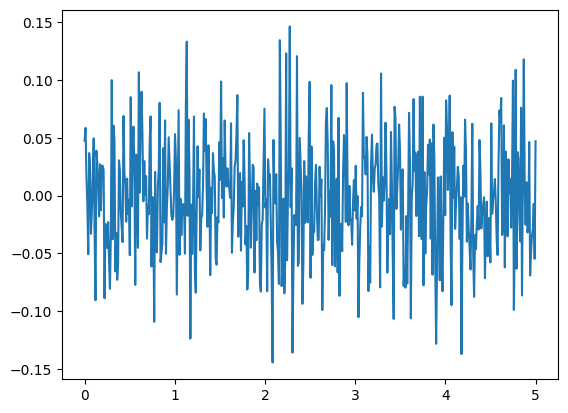

In [ ]:
plt.plot(tempo,ruido)

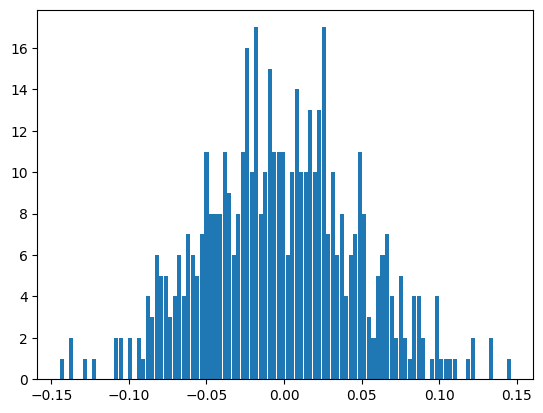

In [ ]:
plt.hist(ruido, 100, rwidth=0.9)
plt.show()